In [1]:
import math
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeit import Timer
from random import randint

In [2]:
def toInt(x):
    try:
       return int("".join(map(str, x)))
    except ValueError:
       return 0

def addLeadingZero(v):
    if (len(v) % 2 == 1 or len(v) == 0):
        v[:0] = [0]
        return v
    else:
        return v
    
def genRandom(n):
    return ''.join(["%s" % randint(0, 9) for num in range(0, n)])

In [3]:
def dc(x, y, verbose=False): 
    if (len(x) == 1):
        return x[0] * y[0]
    
    x = addLeadingZero(x)
    y = addLeadingZero(y)
    n = len(x)
    
    m = int(math.ceil(float(n) / 2))
    X1 = x[0:m]
    X0 = x[m:]
    Y1 = y[0:m]
    Y0 = y[m:]
    
    if (verbose):
        print("m:" + str(m))
        print("X1:" + str(X1))
        print("X0:" + str(X0))
        print("Y1:" + str(Y1))
        print("Y0:" + str(Y0))
        print("================")
        
    X0Y0 = dc(X0, Y0)
    X0Y1 = dc(X0, Y1)
    X1Y0 = dc(X1, Y0)
    X1Y1 = dc(X1, Y1)
    
    if (verbose):
        print("X0Y0:" + str(X0Y0))
        print("X0Y1:" + str(X0Y1))
        print("X1Y0:" + str(X1Y0))
        print("X1Y1:" + str(X1Y1))
        print("================")
    
    return (X1Y1 * pow(10,n)) + ((X1Y0 + X0Y1) * pow(10,n/2)) + X0Y0

def karatsuba(x, y, verbose=False):
    if (len(x) == 1):
        return x[0] * y[0]
    
    x = addLeadingZero(x)
    y = addLeadingZero(y)
    n = len(x)
    
    m = int(math.ceil(float(n) / 2))
    X1 = x[0:m]
    X0 = x[m:]
    Y1 = y[0:m]
    Y0 = y[m:]
    
    if (verbose):
        print("m:" + str(m))
        print("X1:" + str(X1))
        print("X0:" + str(X0))
        print("Y1:" + str(Y1))
        print("Y0:" + str(Y0))
        print("================")
        
    P1 = list(map(int, str(toInt(X1) + toInt(X0))))
    P2 = list(map(int, str(toInt(Y1) + toInt(Y0))))
    
    X0Y0 = karatsuba(X0, Y0)
    X1Y1 = karatsuba(X1, Y1)
    P = karatsuba(P1, P2)
    
    if (verbose):
        print("X0Y0:" + str(X0Y0))
        print("X1Y1:" + str(X1Y1))
        print("P1:" + str(P1))
        print("P2:" + str(P2))
        print("================")
    
    return (X1Y1 * pow(10,n)) + ((P - X1Y1 - X0Y0) * pow(10,n/2)) + X0Y0

In [4]:
print("Divide & Conquer")
print("================")
b = dc([2,3], [1,4], True)
print("Result: " + str(b))
print("================")

print("\n\nKaratsuba")
print("================")
k = karatsuba([1,4,2], [1,3,5], True)
print("Result: " + str(k))
print("================")

Divide & Conquer
m:1
X1:[2]
X0:[3]
Y1:[1]
Y0:[4]
X0Y0:12
X0Y1:3
X1Y0:8
X1Y1:2
Result: 322.0


Karatsuba
m:2
X1:[0, 1]
X0:[4, 2]
Y1:[0, 1]
Y0:[3, 5]
X0Y0:1470.0
X1Y1:1.0
P1:[4, 3]
P2:[3, 6]
Result: 19170.0


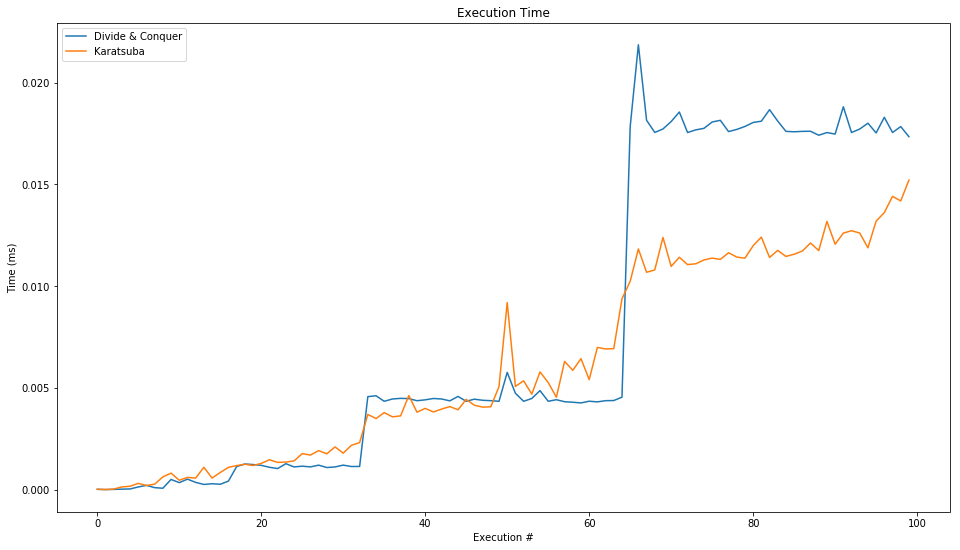

In [5]:
td = []
tk = []

for i in range(0, 100):        
    r = genRandom(i)
    n = list(map(int, str(r)))
    
    rd = Timer(lambda: dc(n, n))
    rt = rd.repeat(repeat=5,number=1)
    td.append(np.mean(rt))

    rk = Timer(lambda: karatsuba(n, n))
    rt = rk.repeat(repeat=5,number=1)
    tk.append(np.mean(rt))
    
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(td, label="Divide & Conquer")
plt.plot(tk, label="Karatsuba")
plt.legend(loc="upper left")
plt.title("Execution Time")
plt.xlabel("Execution #")
plt.ylabel("Time (ms)")
plt.show()